# Initial data exploration
---

[Memotion dataset 7k](https://www.kaggle.com/williamscott701/memotion-dataset-7k): Dataset for sentiment classification of memes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import pickle
from PIL import Image

## Load

In [2]:
print('Current directory:', os.getcwd())
print('Changing directory: moving up')
os.chdir('../')
print('Current directory:', os.getcwd())

Current directory: /Users/victor/Desktop/bert-for-memes/notebooks
Changing directory: moving up
Current directory: /Users/victor/Desktop/bert-for-memes


In [3]:
# Pickling
data_raw_path = "data/raw/"
with open(data_raw_path+"labels_pd_pickle","rb") as file_handle:
    labels_df = pickle.load(file_handle)
    
with open(data_raw_path+"reference_df_pickle","rb") as file_handle:
    reference_df = pickle.load(file_handle)

In [4]:
display(labels_df.head(10))
labels_df.shape

,image_name,text_ocr,text_corrected,humour,sarcasm,offensive,motivational,overall_sentiment
0,image_1.jpg,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,hilarious,general,not_offensive,not_motivational,very_positive
1,image_2.jpeg,The best of #10 YearChallenge! Completed in le...,The best of #10 YearChallenge! Completed in le...,not_funny,general,not_offensive,motivational,very_positive
2,image_3.JPG,Sam Thorne @Strippin ( Follow Follow Saw every...,Sam Thorne @Strippin ( Follow Follow Saw every...,very_funny,not_sarcastic,not_offensive,not_motivational,positive
3,image_4.png,10 Year Challenge - Sweet Dee Edition,10 Year Challenge - Sweet Dee Edition,very_funny,twisted_meaning,very_offensive,motivational,positive
4,image_5.png,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,hilarious,very_twisted,very_offensive,not_motivational,neutral
5,image_6.jpg,"1998: ""Don't get in car with strangers"" 2008: ...","1998: ""Don't get in car with strangers"" 2008: ...",hilarious,general,slight,motivational,negative
6,image_7.png,10 years challenge is lit af Üs & B erg 1945 1...,10 years challenge is lit af Üs & B erg 1945 1...,not_funny,not_sarcastic,not_offensive,not_motivational,negative
7,image_8.jpg,10 Year Challenge emotional edition boredpanda...,10 Year Challenge emotional edition boredpanda...,very_funny,twisted_meaning,not_offensive,not_motivational,neutral
8,image_9.jpg,Fornite died in 10 months but Minecraft never ...,Fornite died in 10 months but Minecraft never ...,funny,not_sarcastic,slight,motivational,positive
9,image_10.png,FACEBOOK '10 YEAR CHALLENGE': A PLOY OR A SIMP...,FACEBOOK '10 YEAR CHALLENGE': A PLOY OR A SIMP...,funny,general,slight,motivational,positive


(6992, 8)

In [5]:
display(reference_df.head(3))
reference_df.shape

,original_name,image_url,image_name
0,10_year_2r94rv.jpg,https://i.imgflip.com/2r94rv.jpg,image_1.jpg
1,10_year_10-year-challenge_1547788782.jpeg,https://spiderimg.amarujala.com/assets/images/...,image_2.jpeg
2,10_year_10yearchallenge-5c75f8b946e0fb0001edc7...,https://www.lifewire.com/thmb/8wNfd94_meE9X2cp...,image_3.JPG


(6992, 3)

## Images

In [6]:
def plot_image(image_name, figure_path=None):
    image = Image.open(data_raw_path+"images/"+image_name)
    # summarize some details about the image
    print(image.format, image.size, image.mode)
    # show the image
    plt.imshow(image)
    plt.axis('off')
    if figure_path:
        plt.savefig(figure_path, bbox_inches='tight')
    plt.show()

JPEG (735, 500) RGB


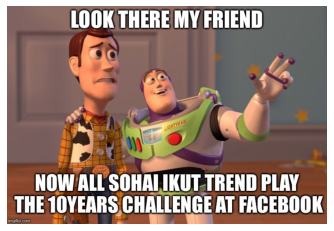

'LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIKUT TREND PLAY THE 10 YEARS CHALLENGE AT FACEBOOK imgflip.com'

In [7]:
plot_image(labels_df.image_name[0])
labels_df.text_corrected[0]

## Text and labels

### Missing values

In [8]:
labels_df.isna().sum()

image_name             0
text_ocr             161
text_corrected         5
humour                 0
sarcasm                0
offensive              0
motivational           0
overall_sentiment      0
dtype: int64

In [9]:
labels_na = labels_df[labels_df.isna().any(axis=1)]
pd.set_option('display.max_rows', labels_na.shape[0]+1)
labels_na

,image_name,text_ocr,text_corrected,humour,sarcasm,offensive,motivational,overall_sentiment
40,image_41.PNG,NaN,Me: Has seen every Marvel movie before Endgame:,very_funny,twisted_meaning,slight,motivational,positive
83,image_84.png,NaN,X-MEN VS AVENGERS MOVIE? AvengersMeme RUSH .....,very_funny,general,not_offensive,not_motivational,very_positive
114,image_115.jpg,NaN,One Does Not Simply Into Mordor Challenge Acce...,very_funny,general,not_offensive,not_motivational,very_positive
119,image_120.jpg,CHALLENGE ACCEPTED! Friend: You can't honestly...,NaN,not_funny,general,not_offensive,not_motivational,positive
283,image_284.PNG,NaN,Mike Tyson bought a new computer. It has two b...,funny,not_sarcastic,not_offensive,not_motivational,positive
298,image_299.jpg,NaN,OKAY,not_funny,twisted_meaning,not_offensive,not_motivational,neutral
354,image_355.jpg,NaN,THE METAL IS STRONG WITH THIS ONE memegenerato...,very_funny,general,very_offensive,not_motivational,negative
524,image_525.jpg,NaN,Monday ? BRING IT ON!,funny,general,slight,not_motivational,very_positive
658,image_659.jpg,NaN,NO.,very_funny,general,slight,motivational,positive
757,image_758.PNG,NaN,Chuck Norris hot 11out of 10 targets Memedroid...,funny,general,slight,motivational,very_positive


In [10]:
labels_na = labels_df[labels_df.text_corrected.isna()]
pd.set_option('display.max_rows', labels_na.shape[0]+1)
labels_na

,image_name,text_ocr,text_corrected,humour,sarcasm,offensive,motivational,overall_sentiment
119,image_120.jpg,CHALLENGE ACCEPTED! Friend: You can't honestly...,NaN,not_funny,general,not_offensive,not_motivational,positive
4799,image_4800.jpg,NaN,NaN,very_funny,general,slight,motivational,neutral
6781,image_6782.jpg,NaN,NaN,very_funny,twisted_meaning,not_offensive,not_motivational,positive
6784,image_6785.jpg,NaN,NaN,hilarious,general,not_offensive,not_motivational,positive
6786,image_6787.jpg,NaN,NaN,not_funny,not_sarcastic,very_offensive,motivational,positive


119
JPEG (500, 480) RGB


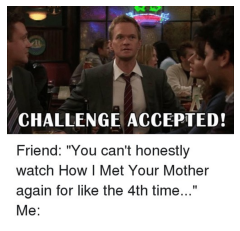

4799
JPEG (612, 816) RGB


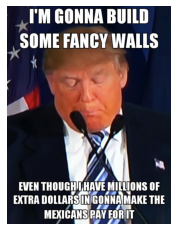

6781
JPEG (614, 432) RGB


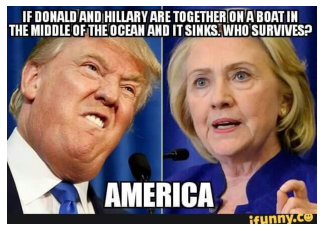

6784
JPEG (698, 491) RGB


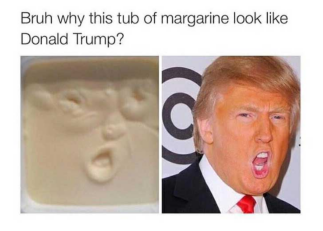

6786
JPEG (944, 473) RGB


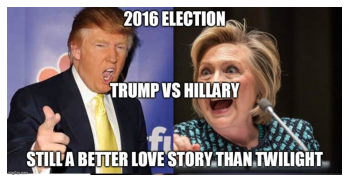

In [11]:
# Explore the 5 images with NaN text_corrected 
for i, row in labels_na.iterrows():
    print(i)
    plot_image(row.image_name)

### Drop NA

In [12]:
labels_df = labels_df.dropna()

### Labels distribution

In [13]:
labels_df.describe()

,image_name,text_ocr,text_corrected,humour,sarcasm,offensive,motivational,overall_sentiment
count,6830,6830,6830,6830,6830,6830,6830,6830
unique,6830,6644,6784,4,4,4,2,5
top,image_1.jpg,"<html><head><meta content=""text/html; charset=...","<html><head><meta content=""text/html; charset=...",funny,general,not_offensive,not_motivational,positive
freq,1,104,5,2394,3430,2657,4421,3057


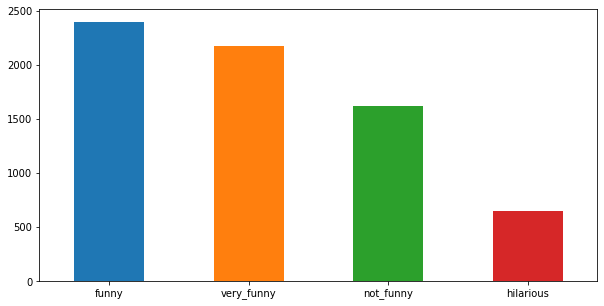

In [14]:
colors = ['C0', 'C1', 'C2', 'C3', 'C4']
_ = labels_df.humour.value_counts().plot(kind='bar', figsize=(10,5), rot=0, color=colors)
plt.savefig('reports/figures/humour_distribution.png', bbox_inches='tight')

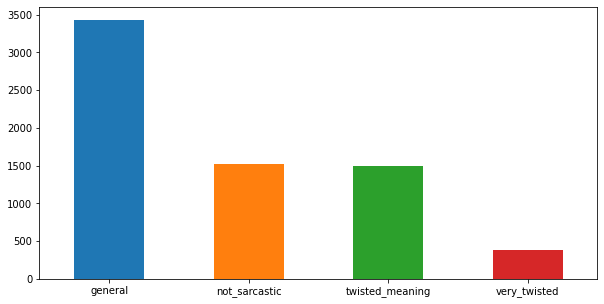

In [15]:
_ = labels_df.sarcasm.value_counts().plot(kind='bar', figsize=(10,5), rot=0, color=colors)
plt.savefig('reports/figures/sarcasm_distribution.png', bbox_inches='tight')

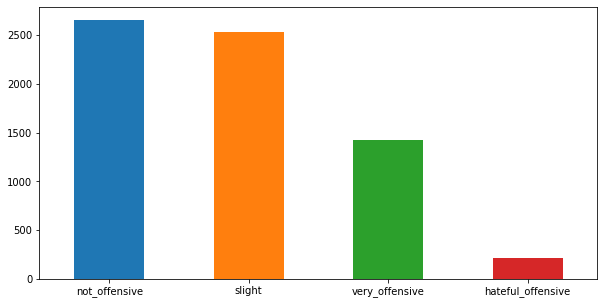

In [16]:
_ = labels_df.offensive.value_counts().plot(kind='bar', figsize=(10,5), rot=0, color=colors)
plt.savefig('reports/figures/offensive_distribution.png', bbox_inches='tight')

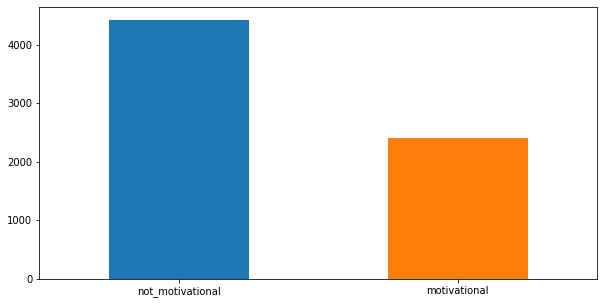

In [17]:
_ = labels_df.motivational.value_counts().plot(kind='bar', figsize=(10,5), rot=0, color=colors)
plt.savefig('reports/figures/motivational_distribution.png', bbox_inches='tight')

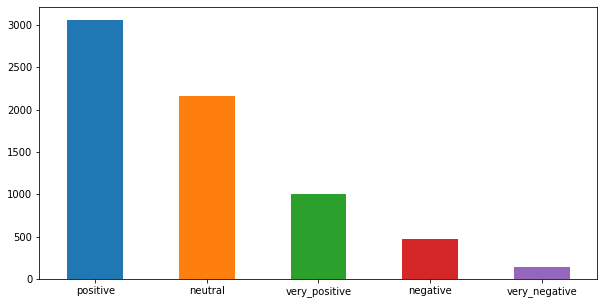

In [18]:
_ = labels_df.overall_sentiment.value_counts().plot(kind='bar', figsize=(10,5), rot=0, color=colors)
plt.savefig('reports/figures/overall_sentiment_distribution.png', bbox_inches='tight')